## Import dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Reading CSV file

In [2]:
df = pd.read_csv("Zomato_rest_coimbatore_df.csv")
coord_df = pd.read_csv("zomato_restaurant_gps_coordinates.csv")

In [3]:
df = df.merge(coord_df, how = "left", on = "rest_name")

In [4]:
df.to_csv("zomato_prefinal.csv", index = False)

## Feature column details
----------------------------
1. **rest_name** - Restaurant name
2. **rating** - Restaurant rating
3. **pro_offer** - Additional offer for Zomato Pro users
4. **offer** - Common offer available for every users
5. **del_time** - Delivery time for the restaurants. I think it's an average delivery time since I didn't mention my area during scraping.
6. **category** - Restaurant category based on the food served
7. **cost_for_one** - Approximate meal cost for one person
8. **recent_orders_count** - Recent orders count of the restaurant. This stats is provided by Zomato


In [12]:
df.head()[["lat","long"]]

,lat,long
0,11.020968,76.993288
1,11.013892,76.967540
2,11.023680,77.017490
3,11.016496,76.965508
4,10.999788,76.973444


In [6]:
df.info()  ## Info about the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 0 to 688
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rest_name            689 non-null    object 
 1   rating               689 non-null    object 
 2   pro_offer            68 non-null     object 
 3   offer                461 non-null    object 
 4   del_time             575 non-null    object 
 5   category             689 non-null    object 
 6   cost_for_one         689 non-null    object 
 7   recent_orders_count  538 non-null    object 
 8   lat                  516 non-null    float64
 9   long                 516 non-null    float64
dtypes: float64(2), object(8)
memory usage: 59.2+ KB


## DATA CLEANING
----------------

#### We'll start cleaning feature columns one by one and convert it to appropriate data types

* Feature column 'Rest_name'

In [7]:
df.rest_name.nunique() # Since there're 627 restaurants in Coimbatore and there can be many outlets for a single food chain, we will see the number of unique restaurants.

596

In [8]:
df.rating.unique() ## Checking the feature 'rating' for it's unique values. We can see it is of 'object' data type and we need to convert it into 'float' d-type.

array(['New', '4.1', '4.2', '3.7', '3.9', '3.8', '4.0', '4.4', '3.6',
       '4.3', '3.2', '3.5', '3.4', '4.5', '3.3', '4.7', '3.1', '4.6', '-',
       '3.0', '2.9', '2.6', '2.7'], dtype=object)

In [9]:
df.rating = df['rating'].replace(['New', '-'], [np.nan, np.nan])  #Replacing 'New' and '-' values in the feature 'rating' to null value 'np.nan'. Since assigning it to zero will distorts the mean value of the feature column.
df.rating = pd.to_numeric(df.rating)  # pd.to_numeric() converts the rating column to appropriate data type i.e here it's *float*

In [10]:
df.rating.unique() #Again checking for it's unique values for any errors

array([nan, 4.1, 4.2, 3.7, 3.9, 3.8, 4. , 4.4, 3.6, 4.3, 3.2, 3.5, 3.4,
       4.5, 3.3, 4.7, 3.1, 4.6, 3. , 2.9, 2.6, 2.7])

In [23]:
df.pro_offer.unique() ## Checking the feature 'pro_offer' for it's unique values. We can see it is of 'object' data type and we need to convert it into 'float' d-type.

array([nan, 'Pro extra 25% OFF', 'Pro extra 15% OFF', 'Pro extra 20% OFF',
       'Pro extra 10% OFF', 'Pro extra 30% OFF'], dtype=object)

In [24]:
# Function for extracting numbers(offer percentage) from string and ignoring every other thing.
def null_filter(x):
    if pd.isnull(x):
        return x
    else:
        digit = ''.join(filter(str.isdigit, x))
        if digit.isdigit():
            return float(digit)
        else:
            return np.nan        

In [25]:

df.pro_offer = np.vectorize(null_filter)(df.pro_offer) #passing the feature column 'pro_offer' to the function
df.pro_offer = pd.to_numeric(df.pro_offer) #converting to Numeric ie. here it is float

In [26]:
df.pro_offer.unique() #Again checking for it's unique values for any errors

array([nan, 25., 15., 20., 10., 30.])

In [27]:
df.offer.unique() # Checking the feature 'offer' for it's unique values. We can see it is of 'object' data type and we need to convert it into 'float' d-type

array(['30% OFF', '40% OFF', '20% OFF', '60% OFF', 'Pro extra 15% OFF',
       '50% OFF', 'Pro extra 10% OFF', nan, '10% OFF', 'Flat 10% OFF',
       'Flat 15% OFF', 'Flat 20% OFF', 'Pro extra 20% OFF', '₹50 OFF',
       'Free McSpicy Fried Chicken - One Pc', 'At ₹249 only',
       'Pro extra 25% OFF', 'Pro extra 30% OFF', '25% OFF',
       'Flat 50% OFF', '₹100 OFF', 'Flat 30% OFF', '15% OFF', '₹75 OFF',
       '35% OFF'], dtype=object)

In [28]:
def offer_str(offer):
    if pd.isnull(offer):
        return offer
    elif '₹' in list(offer):
        return np.nan
    else:
        digit = ''.join(filter(str.isdigit, offer))
        if digit.isdigit():
            return float(digit)
        else:
            return np.nan     


df.offer = np.vectorize(offer_str)(df.offer)


In [29]:
df.offer.unique()

array([30., 40., 20., 60., 15., 50., 10., nan, 25., 35.])

In [30]:
df.del_time.unique()

array(['43 min', '32 min', '40 min', '38 min', '37 min', '31 min',
       '48 min', '42 min', '36 min', '35 min', '41 min', '34 min',
       '30 min', '39 min', '44 min', '47 min', '29 min', '26 min',
       '28 min', '33 min', '56 min', '45 min', '57 min', '49 min',
       '46 min', '52 min', '51 min', '54 min', '61 min', '24 min',
       '66 min', '53 min', '50 min', '22 min', '60 min', '58 min',
       '55 min', '67 min', '59 min', '62 min', '23 min', '20 min',
       '27 min', '63 min', nan, '64 min', '68 min'], dtype=object)

In [31]:
df.del_time = np.vectorize(null_filter)(df.del_time)
df.del_time = pd.to_numeric(df.del_time)


In [32]:

df.cost_for_one = np.vectorize(null_filter)(df.cost_for_one)
df.cost_for_one = pd.to_numeric(df.cost_for_one)


In [33]:
df.recent_orders_count = np.vectorize(null_filter)(df.recent_orders_count)
df.recent_orders_count = pd.to_numeric(df.recent_orders_count)

In [34]:
df.recent_orders_count.unique()

array([ 1425.,  4125.,   375.,  5150.,  2500.,  2075.,   850., 12150.,
         725.,  2350.,  9925.,  3625.,  1500.,  4875.,  3200.,  1950.,
        2250.,  1725.,  4500., 15775.,  4175.,  3475.,  8675., 13950.,
        2175.,  6425.,  2950.,  1900.,  3500.,  7600.,  4200.,  4225.,
         950.,   825.,  3100.,  1825.,  3450.,  1550.,  2025.,   350.,
        1075.,   325.,  1625.,   250.,   700.,   875.,  2400.,  1200.,
        2875.,  1700.,  2700.,   275.,  4150.,  2925.,  5025.,  3325.,
        1000.,  3250.,  1525.,   400.,   450.,  1025.,   800.,   775.,
         675.,  5575.,   475.,  5425.,  3125.,   300.,   925.,  2300.,
        2325.,  1350.,   225.,   150.,   125.,    nan,  2625.,  1175.,
         550.,  1975.,  2375.,   100.,  1875.,  1150.,   600.,  1275.,
        1400.,   975.,  2000.,  1600.,  1325.,    75.,   625.,    50.,
        1650.,  2100.,   575.,   500.,  1125.,   200.,  1050.,   525.,
         425.,   175.,  1675.,   650.])

In [35]:
df.category.unique()

array(['Biryani, North Indian, South Indian, Chinese, BBQ',
       'South Indian, Hyderabadi, Chinese, Biryani, Desserts, Ice Cream, Beverages, Shake',
       'Biryani, North Indian, Chinese, Bengali',
       'South Indian, North Indian, Chinese, Beverages, Shake',
       'South Indian, Biryani', 'South Indian, North Indian, Chinese',
       'Biryani, South Indian, Chinese, North Indian',
       'Biryani, South Indian', 'North Indian, Kebab, BBQ, Biryani',
       'Chettinad, Chinese, North Indian, South Indian, Seafood',
       'South Indian', 'South Indian, North Indian, Chinese, Beverages',
       'Burger, Fast Food, Beverages, Desserts', 'South Indian, Chinese',
       'Fast Food, South Indian, Chinese',
       'Pizza, Fast Food, Desserts, Beverages',
       'Biryani, Chinese, Mughlai, North Indian, Seafood',
       'Chinese, North Indian, Biryani, South Indian',
       'South Indian, Chinese, Street Food, North Indian, Sandwich, Desserts, Beverages, Shake',
       'North Indian, Ch

In [36]:
cat_dict = {}
for categories in df.category:
    ind_cat = categories.split(',')
    for cat in ind_cat:
        i = cat.strip()
        if i in cat_dict:
            cat_dict[i] +=1
        else:
            cat_dict[i] = 1          


In [37]:
category_count = pd.Series(cat_dict)
category_count = category_count.sort_values(ascending=False)

## Exploratory Data Analysis
--------------

In [38]:
df.info() # info about data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 0 to 688
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rest_name            689 non-null    object 
 1   rating               557 non-null    float64
 2   pro_offer            68 non-null     float64
 3   offer                456 non-null    float64
 4   del_time             575 non-null    float64
 5   category             689 non-null    object 
 6   cost_for_one         689 non-null    float64
 7   recent_orders_count  490 non-null    float64
 8   lat                  516 non-null    float64
 9   long                 516 non-null    float64
dtypes: float64(8), object(2)
memory usage: 59.2+ KB


In [46]:
df.to_csv("zomato_final.csv", index = False)

In [39]:
df.describe()  #quick stats on the dataframe

,rating,pro_offer,offer,del_time,cost_for_one,recent_orders_count,lat,long
count,557.000000,68.000000,456.000000,575.000000,689.000000,490.000000,516.000000,516.000000
mean,3.884201,20.441176,30.997807,42.794783,146.879536,928.163265,11.015937,76.972464
std,0.337311,6.449303,15.694263,8.355326,80.250254,1613.072933,0.015867,0.023805
min,2.600000,10.000000,10.000000,20.000000,50.000000,50.000000,10.956561,76.894540
25%,3.700000,15.000000,20.000000,38.000000,100.000000,150.000000,11.006640,76.951673
50%,4.000000,20.000000,30.000000,42.000000,100.000000,400.000000,11.015360,76.968761
75%,4.100000,25.000000,40.000000,48.500000,200.000000,993.750000,11.024934,76.991879
max,4.700000,30.000000,60.000000,68.000000,400.000000,15775.000000,11.082529,77.045549


##### Heatmap for checking correlation between variables

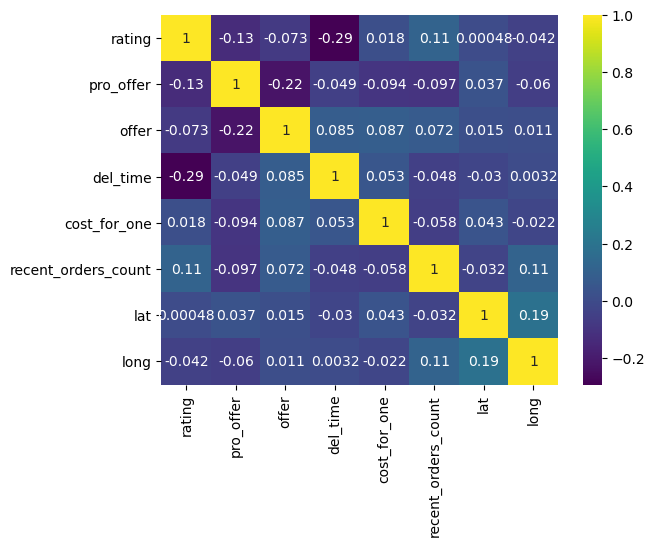

In [40]:
sns.heatmap(df.corr(),annot=True, cmap = 'viridis')
plt.show()

As we can see there is no strong correlation between the features. The highest correlation is between **rating** and **delivery time** which is -0.27. The negative correlation between them is relatable because restaurants with less delivery time tends to have high rating.

### Top 10 hotels based on rating

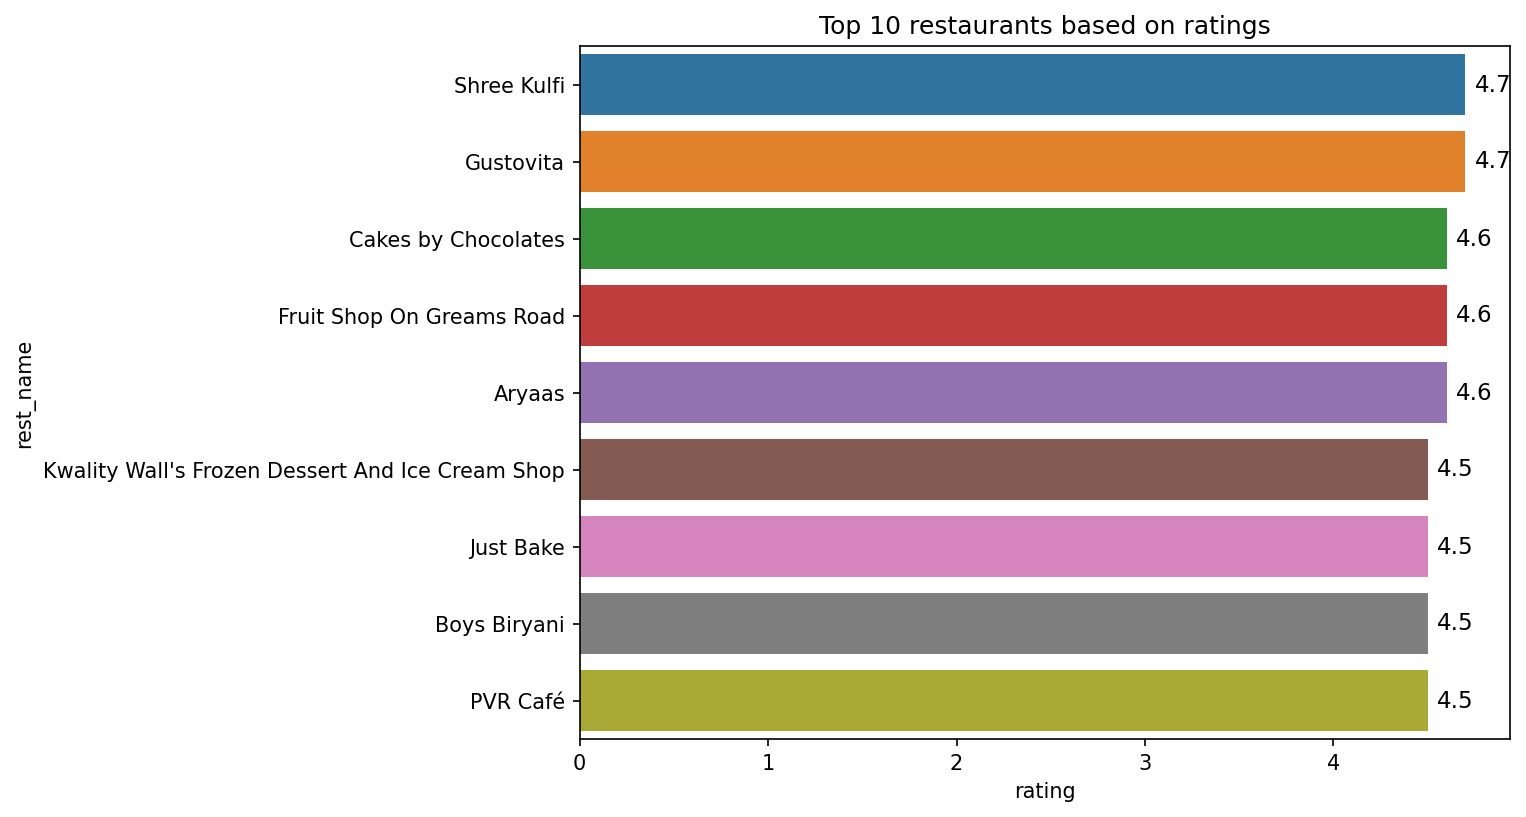

In [41]:
title = f"Top 10 restaurants based on ratings"
plt.figure(figsize = (8,6), dpi = 150)
ax = sns.barplot(data = df[['rest_name','rating']].dropna().sort_values('rating', ascending =False)[:10], x = 'rating', y = 'rest_name')
ax.set_title(title) #set plot title
#For showing count values above the bars
for rect in ax.patches:
    ax.text (x = rect.get_width()+ 0.05,y = rect.get_y() + rect.get_height()  / 2, s = float(rect.get_width()),verticalalignment='center', fontsize = 11)
    
#For saving the figure    
# plt.savefig('Top 25 most-ordered customers btw 01-03-2021 to 01-08-2021.jpg')
plt.show()

From the above chart it looks like Desserts and Bakes shop ranks high in rating.

#### Common Offers for normal user. For this let's plot as distribution plot

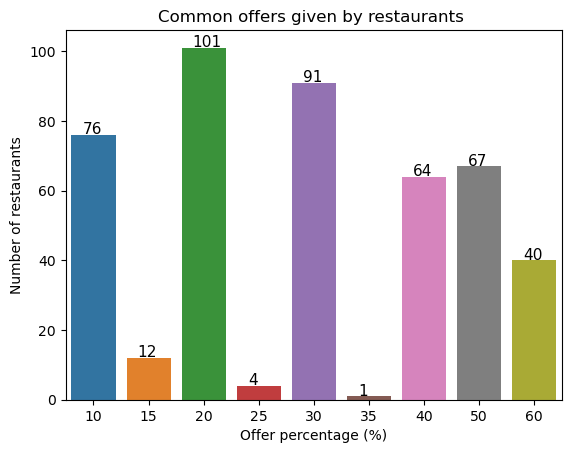

In [42]:
ax = sns.countplot(x = df.offer.dropna())
ax.set_title("Common offers given by restaurants ")
ax.set_xlabel("Offer percentage (%)")
ax.set_ylabel('Number of restaurants')
ax.set_xticklabels(list(df.offer.dropna().sort_values().unique().astype('int32')))

for rect in ax.patches:
    ax.text (x = rect.get_x()+ rect.get_width()/4 ,y = rect.get_height()+ 1.5 , s = rect.get_height(),verticalalignment='center', fontsize = 11)
    
plt.show()

Lookslike most restaurants offers 20% and 30% followed by 50% and 40%.

### Restaurants category count in Coimbatore

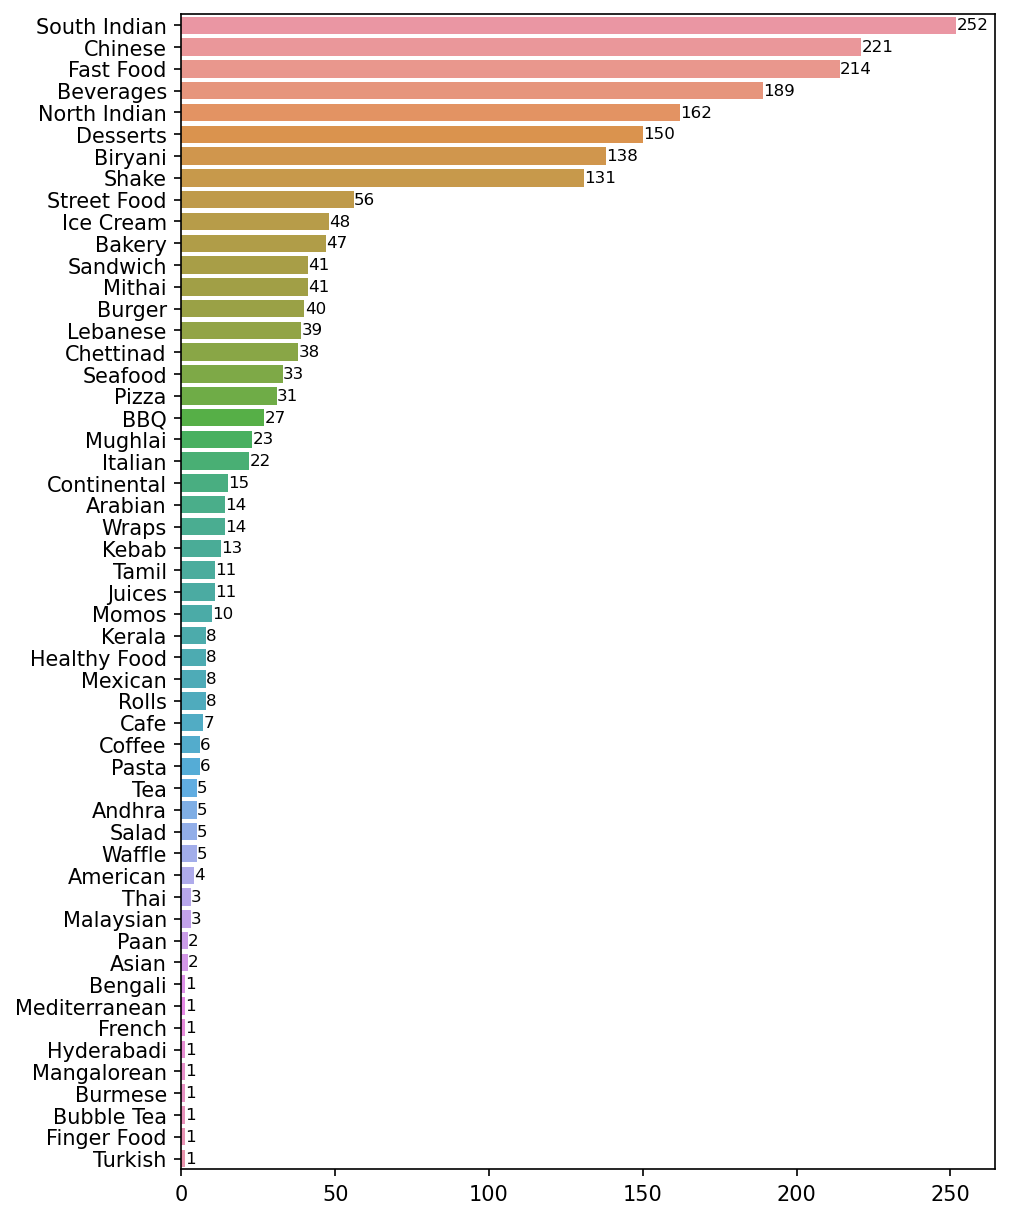

In [43]:
plt.figure(figsize=(7,10), dpi=150)
ax= sns.barplot(y=category_count.index, x= category_count.values)
#For showing count values above the bars
for rect in ax.patches:
    ax.text (x = rect.get_width()+ 0.05,y = rect.get_y() + rect.get_height()  / 2, s = int(rect.get_width()),verticalalignment='center', fontsize = 8)
plt.show()

* South Indian, Fastfood, Chinese and Beverages are the top 4 consecutive categories available in most restaurants in Coimbatore. 
* Interestingly North Indian ranks 5th which indicates North Indian food craze among people in Coimbatore.
* Desserts, Biryani and Shakes holds the next consecutive ranks for commonly available in many restaurants.

### Cost for one person in a restaurant

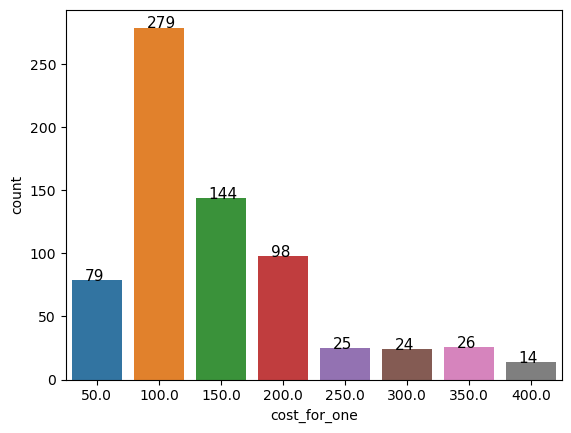

In [44]:
ax = sns.countplot(data = df[['rest_name', 'cost_for_one']].dropna(), x = 'cost_for_one')
for rect in ax.patches:
    ax.text (x = rect.get_x()+ rect.get_width()/4 ,y = rect.get_height()+ 3 , s = rect.get_height(),verticalalignment='center', fontsize = 11)

plt.show()

Most of the restaurants costs Rs.100 for single person which indicates budget restaurants are in high numbers.

### Top 10 restaurants with high recent orders

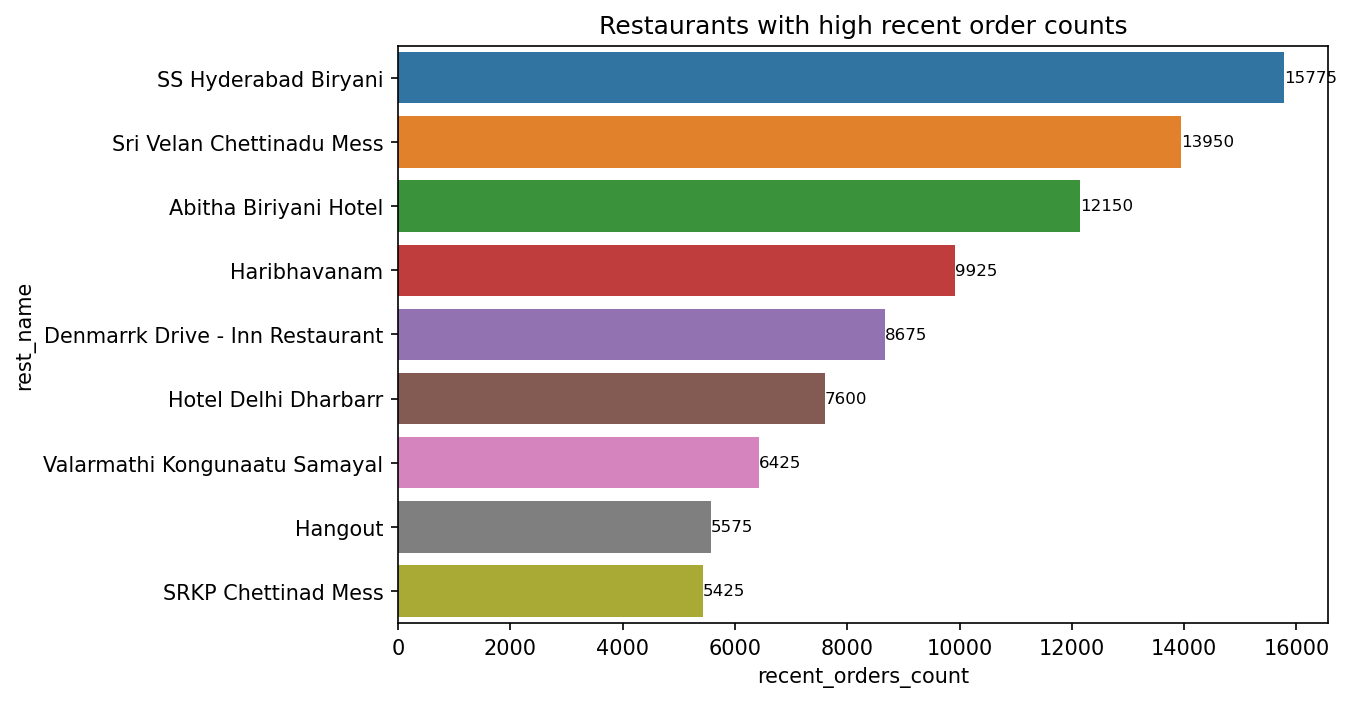

In [45]:
plt.figure(figsize = (8,5), dpi = 150)
ax = sns.barplot(data = df[['rest_name', 'recent_orders_count']].dropna().sort_values('recent_orders_count',ascending=False)[:10], y= 'rest_name', x = 'recent_orders_count')
ax.set_title('Restaurants with high recent order counts')
for rect in ax.patches:
    ax.text (x = rect.get_width()+ 0.05,y = rect.get_y() + rect.get_height()  / 2, s = int(rect.get_width()),verticalalignment='center', fontsize = 8)

plt.show()

Biryani seems to be the favorite dish among the Coimbatore peoples

-----------------------------------------------------------------